In [99]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

In [42]:
partners_df = pd.read_csv('../data/processed/supply_chain_data.csv')
partners_df.loc[partners_df['Country'].isin(['UNITED STATES', ' UNITED STATES ']), 'Country'] = 'US'
partners_df.loc[partners_df['Country'].isin(['TAIWAN', ' TAIWAN ']), 'Country'] = 'Taiwan'
customers_df = partners_df[partners_df['Relationship Type'] == 'Customer']
suppliers_df = partners_df[partners_df['Relationship Type'] == 'Supplier']

In [60]:
partners_df.shape

(1973, 6)

In [67]:
G_customer = nx.from_pandas_edgelist(customers_df, source='Company', target='Partner', create_using=nx.DiGraph())
G_supplier = nx.from_pandas_edgelist(suppliers_df, source='Company', target='Partner', create_using=nx.DiGraph())

In [120]:
def generate_supply_chain_network_graph(G, partner_df, partner):
    country_colors = {'Taiwan': "Red", "US": 'Blue', "NETHERLANDS": 'Orange', "SWITZERLAND": "Pink"}
    color_map = []
    for node in G: 
        try:
            country = partner_df.loc[partner_df['Company'] == node, 'Country'].unique()[0]
            color_map.append(country_colors[country])
        except IndexError:
            color_map.append('Black')
            
    G_spring = nx.spring_layout(G)
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = G_spring[edge[0]]
        x1, y1 = G_spring[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)


    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = G_spring[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=False,
            size=10,
            line_width=2)
    )

    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(list(G.nodes())[node])


    node_trace.marker.color = color_map
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout= go.Layout(
                        title=f"{partner} Networks",
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[dict(
                            text='',
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002 ) ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
    return fig

In [107]:

fig.show()

In [121]:
generate_supply_chain_network_graph(G_supplier, suppliers_df, 'Supplier')

In [116]:
generate_supply_chain_network_graph(G_supplier, suppliers_df, 'Supplier')

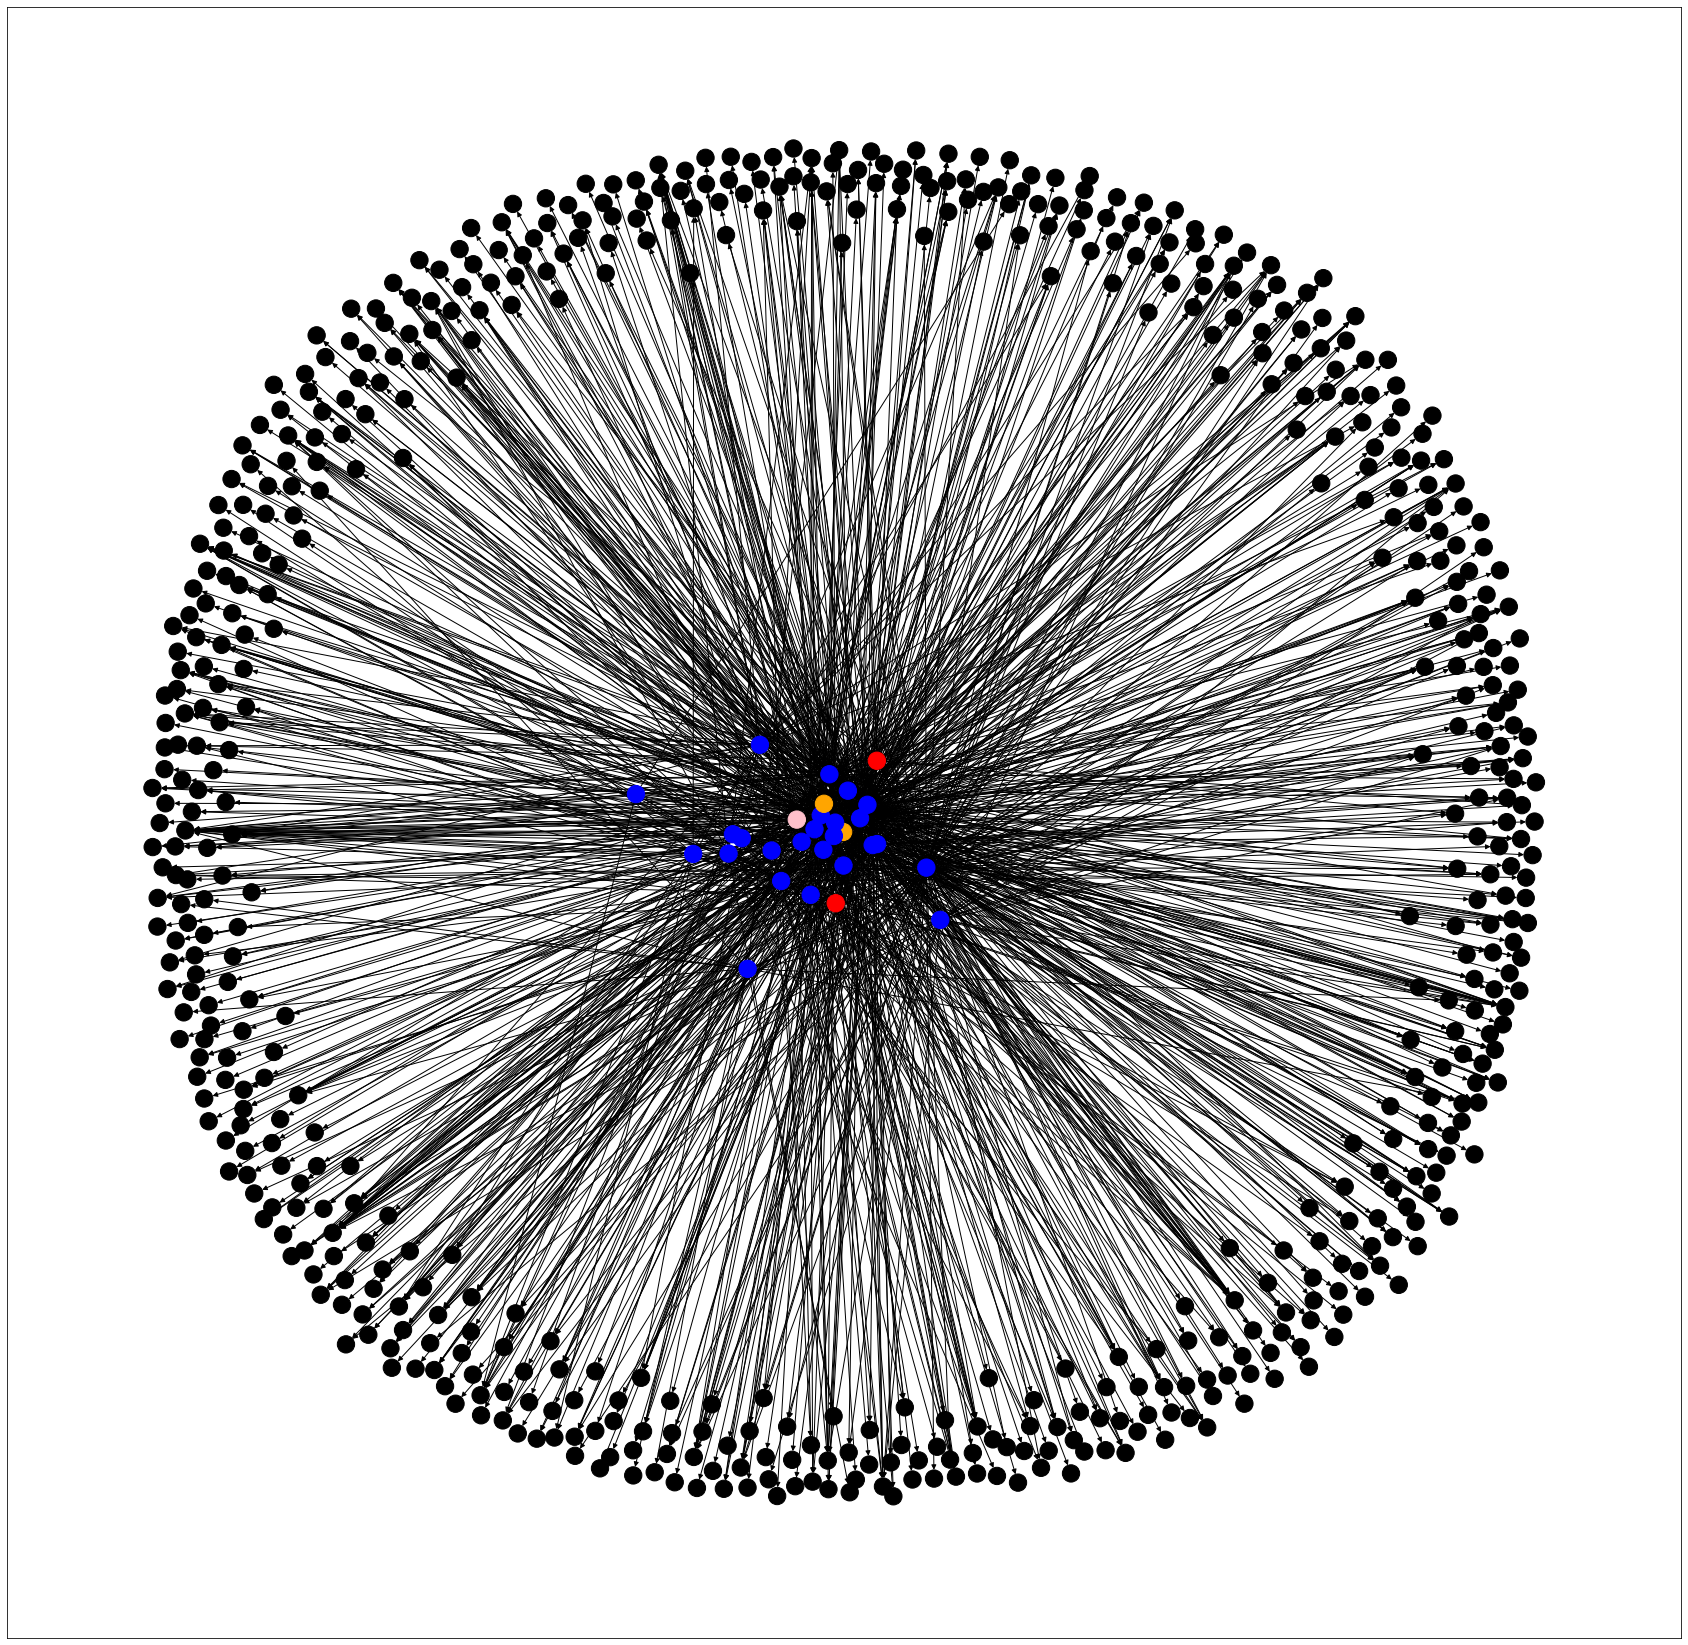

In [73]:
fig = plt.figure(figsize=(30, 30))
nx.draw_networkx(G_customer, with_labels=False, node_color=customer_color_map)

In [74]:
country_colors = {'Taiwan': "Red", "US": 'Blue', "NETHERLANDS": 'Orange', "SWITZERLAND": "Pink"}
supplier_color_map = []
for node in G_supplier: 
    try:
        country = suppliers_df.loc[suppliers_df['Company'] == node, 'Country'].unique()[0]
        supplier_color_map.append(country_colors[country])
    except IndexError:
        supplier_color_map.append('Black')

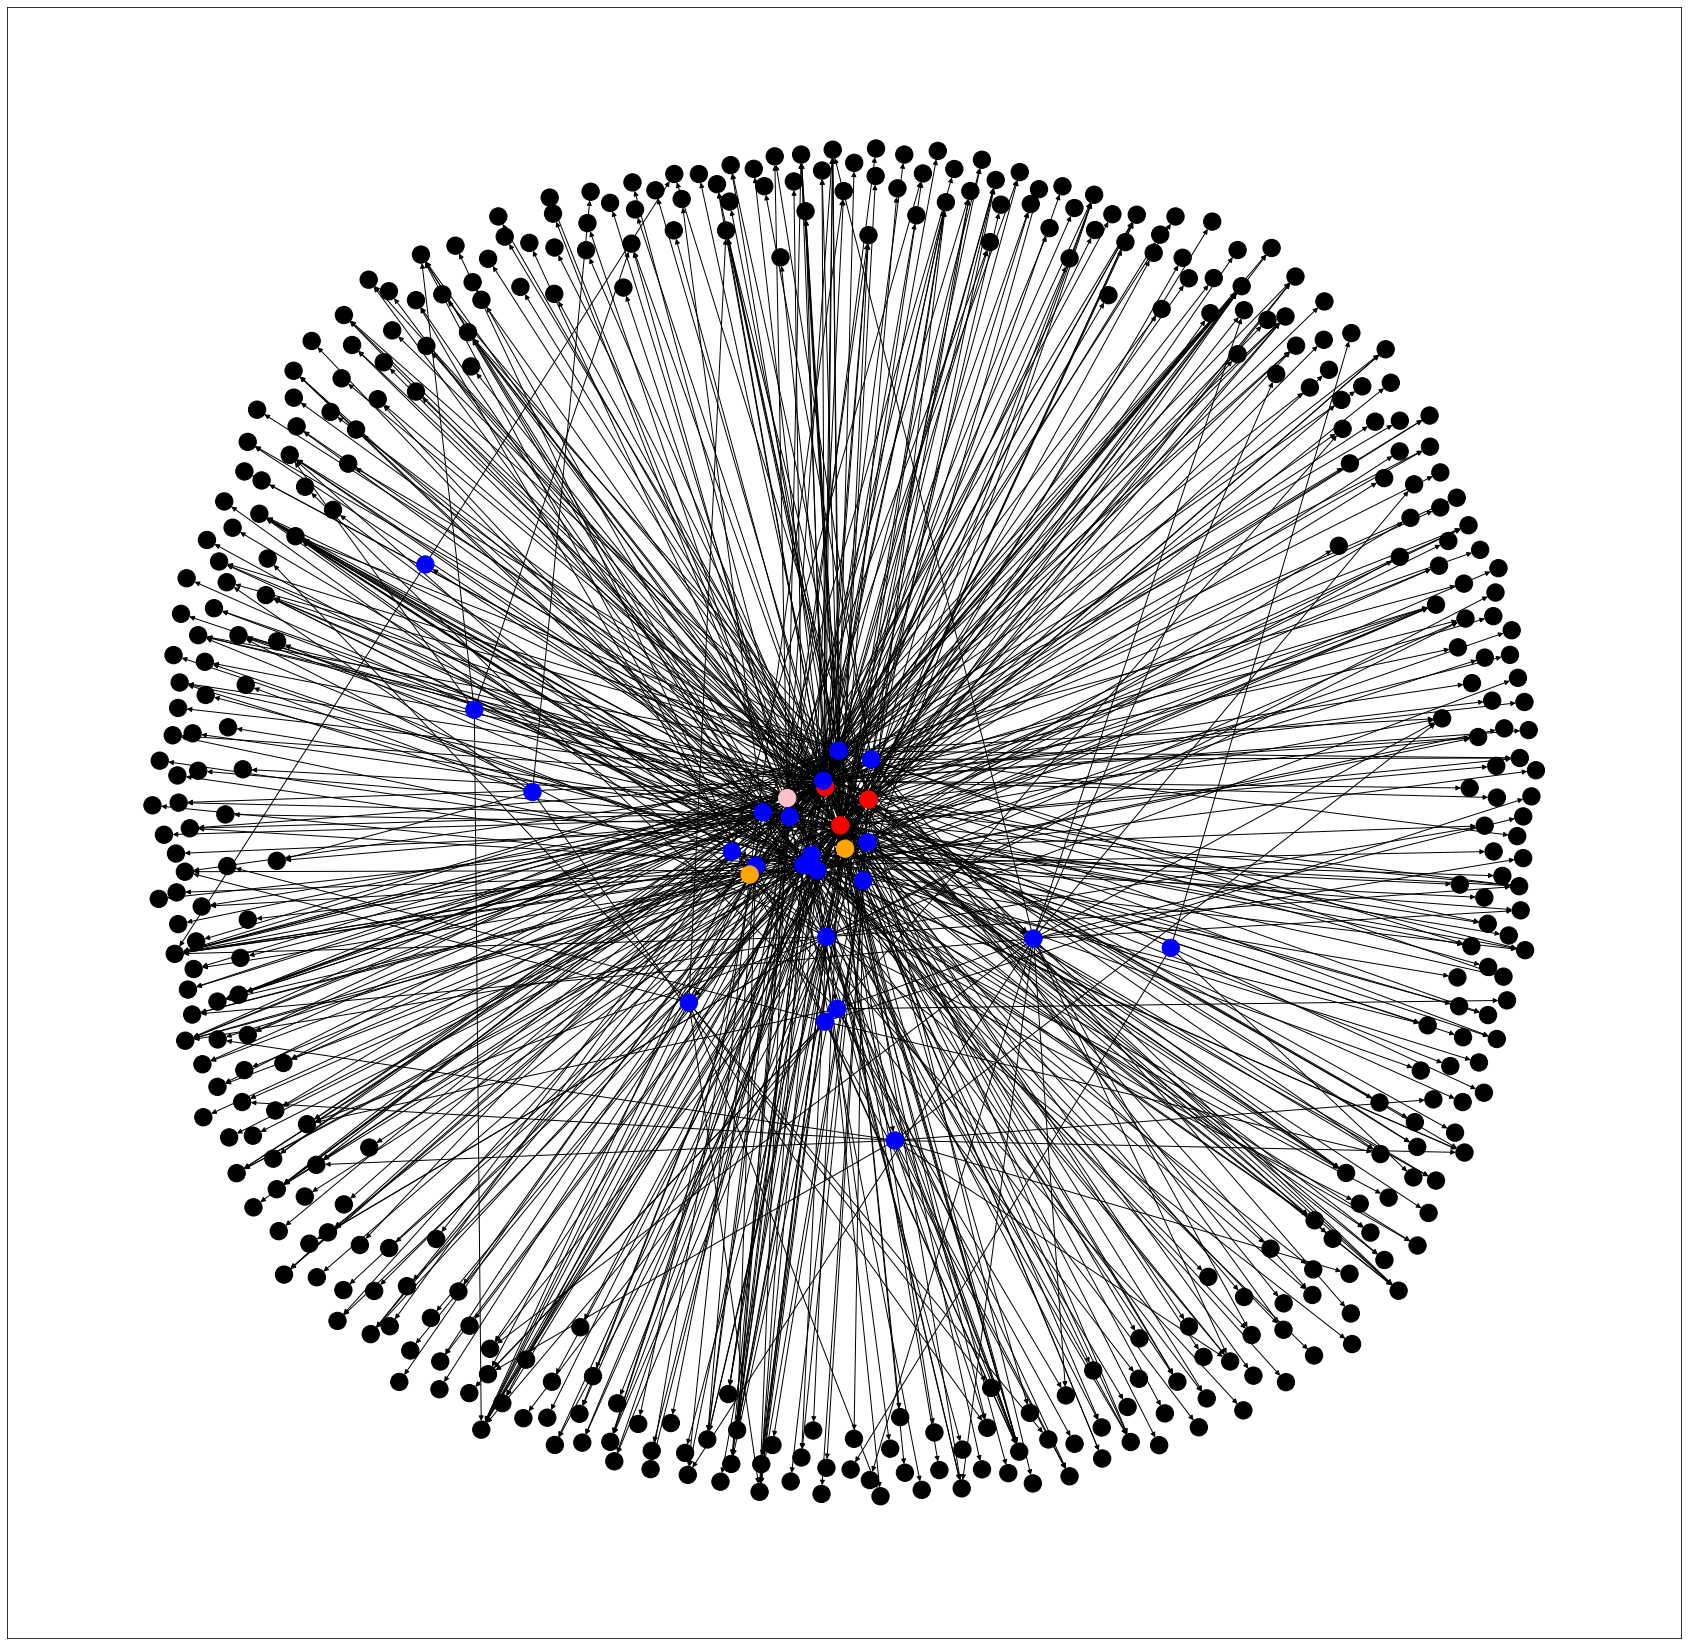

In [75]:
fig = plt.figure(figsize=(30, 30))
nx.draw_networkx(G_supplier, with_labels=False, node_color=supplier_color_map)

In [84]:
in_degree_centrality = pd.DataFrame(nx.in_degree_centrality(G_supplier).items()).sort_values(by=1, ascending=False)
in_degree_centrality.columns = ['Company', 'Chokepoint Score']
in_degree_centrality.to_csv('../data/processed/Supplier_Indegree_Score.csv', index=False)

In [122]:
supplier_betweeness = pd.DataFrame(nx.betweenness_centrality(G_supplier).items()).sort_values(by=1, ascending=False)
supplier_betweeness.columns = ['Company', 'Chokepoint Score']
supplier_betweeness.to_csv('../data/processed/Supplier_Betweeness_Score.csv', index=False)

In [86]:
customer_out_centrality = pd.DataFrame(nx.out_degree_centrality(G_customer).items()).sort_values(by=1, ascending=False)
customer_out_centrality.columns = ['Company', 'Chokepoint Score']
customer_out_centrality.to_csv('../data/processed/Customer_Outdegree_Score.csv', index=False)

In [87]:
customer_betweeness_score = pd.DataFrame(nx.betweenness_centrality(G_customer).items()).sort_values(by=1, ascending=False)
customer_betweeness_score.columns = ['Company', 'Chokepoint Score']
customer_betweeness_score.to_csv('../data/processed/Customer_Betweeness_Score.csv', index=False)